# Spark - Ejercicios Dataframes y preprocesado (refuerzo)
## Por Pablo C. Cañizares

In [2]:
import findspark

findspark.init()

import pyspark  # only run after findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

df = spark.sql("""select 'spark' as hola """)
df.show()

24/10/14 13:07:56 WARN Utils: Your hostname, ubuntu resolves to a loopback address: 127.0.1.1; using 192.168.1.101 instead (on interface wlp0s20f3)
24/10/14 13:07:56 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/14 13:08:06 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+-----+
| hola|
+-----+
|spark|
+-----+



24/10/14 13:08:17 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


### Ejercicio 1: Carga de fichero CSV con dataframes y selecciones de columnas

In [110]:
# Cargar archivo CSV como DataFrame
df = spark.read.csv("RT_IOT2022_v2.csv", header=True, inferSchema=True)

# Seleccionar las columnas especificadas
columns_to_keep = ['no', '`id.orig_p`', '`id.resp_p`', 'proto', 'service', 'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'Attack_type']
df_selected = df.select(columns_to_keep)

# Mostrar las primeras filas del DataFrame resultante
df_selected.show()

+---+---------+---------+-----+-------+------------------+------------+------------+------------+
| no|id.orig_p|id.resp_p|proto|service|     flow_duration|fwd_pkts_tot|bwd_pkts_tot| Attack_type|
+---+---------+---------+-----+-------+------------------+------------+------------+------------+
|  0|    38667|     1883|  tcp|   mqtt|         32.011598|           9|           5|MQTT_Publish|
|  1|    51143|     1883|  tcp|   mqtt|31.883584000000006|           9|           5|MQTT_Publish|
|  2|    44761|     1883|  tcp|   mqtt|         32.124053|           9|           5|MQTT_Publish|
|  3|    60893|     1883|  tcp|   mqtt|         31.961063|           9|           5|MQTT_Publish|
|  4|    51087|     1883|  tcp|   mqtt|         31.902362|           9|           5|MQTT_Publish|
|  5|    48579|     1883|  tcp|   mqtt|         31.869686|           9|           5|MQTT_Publish|
|  6|    54063|     1883|  tcp|   mqtt|         32.094711|           9|           5|MQTT_Publish|
|  7|    33457|     

### Ejercicio 2: Consulta básica con SparkSQL

Registra el DataFrame como una tabla temporal y utiliza una consulta SQL para mostrar los primeros 5 registros que tengan una duración de flujo (flow_duration) mayor a 10 segundos. Analiza y realiza el resto de consultas.
a) Utilizando filter
b) Utilizando tabla temporal (extra)


In [1]:
# Filter y select

# Utilizando tablas temporales


NameError: name 'df' is not defined

### Ejercicio 3: Uso de SparkSQL para contar ataques

Usa una consulta en SparkSQL para contar cuántos registros hay por cada tipo de ataque.

In [114]:
# Registrar el DataFrame como una tabla temporal
df_selected.createOrReplaceTempView("iot_data")

#solución


+--------------------+-----+
|         Attack_type|count|
+--------------------+-----+
|         Thing_Speak| 8108|
|          Wipro_bulb|  253|
|        MQTT_Publish| 4146|
|      ARP_poisioning| 7750|
|       DOS_SYN_Hping|94659|
|      DDOS_Slowloris|  534|
|       NMAP_UDP_SCAN| 2590|
| NMAP_XMAS_TREE_SCAN| 2010|
|       NMAP_TCP_scan| 1002|
|       NMAP_FIN_SCAN|   28|
|Metasploit_Brute_...|   37|
|   NMAP_OS_DETECTION| 2000|
+--------------------+-----+



### Ejercicio 4: Calcular la media, el mínimo y el máximo de la columna flow_duration

In [116]:
#solución


+------------------+---+------------+
|mean              |min|max         |
+------------------+---+------------+
|3.8166322189869506|0.0|21728.335578|
+------------------+---+------------+



### Ejercicio 5: Eliminación de filas con valores inválidos

Elimina las filas que contienen valores nulos o inválidos en cualquier columna crítica, como

In [118]:
#solución


123117
123117
+---+---------+---------+-----+-------+------------------+------------+------------+------------+
| no|id.orig_p|id.resp_p|proto|service|     flow_duration|fwd_pkts_tot|bwd_pkts_tot| Attack_type|
+---+---------+---------+-----+-------+------------------+------------+------------+------------+
|  0|    38667|     1883|  tcp|   mqtt|         32.011598|           9|           5|MQTT_Publish|
|  1|    51143|     1883|  tcp|   mqtt|31.883584000000006|           9|           5|MQTT_Publish|
|  2|    44761|     1883|  tcp|   mqtt|         32.124053|           9|           5|MQTT_Publish|
|  3|    60893|     1883|  tcp|   mqtt|         31.961063|           9|           5|MQTT_Publish|
|  4|    51087|     1883|  tcp|   mqtt|         31.902362|           9|           5|MQTT_Publish|
|  5|    48579|     1883|  tcp|   mqtt|         31.869686|           9|           5|MQTT_Publish|
|  6|    54063|     1883|  tcp|   mqtt|         32.094711|           9|           5|MQTT_Publish|
|  7| 

### Ejercicio 6: Detección de outliers en la duración del flujo

Detecta outliers en la columna flow_duration usando el rango intercuartílico (IQR).

In [120]:
from pyspark.sql.functions import expr

# Calcular Q1, mediana. Q3 e IQR
quantiles = df_selected.approxQuantile("flow_duration", [0.25, 0.5, 0.75], 0.01)

#solución

print("lower bound: ",lower_bound)
print("upper bound: ",upper_bound)
print("median: ",median)

# Mostrar outliers
df_outliers.show()

lower bound:  -5.000000000000001e-06
upper bound:  1.1000000000000001e-05
median:  4e-06
+---+---------+---------+-----+-------+------------------+------------+------------+------------+
| no|id.orig_p|id.resp_p|proto|service|     flow_duration|fwd_pkts_tot|bwd_pkts_tot| Attack_type|
+---+---------+---------+-----+-------+------------------+------------+------------+------------+
|  0|    38667|     1883|  tcp|   mqtt|         32.011598|           9|           5|MQTT_Publish|
|  1|    51143|     1883|  tcp|   mqtt|31.883584000000006|           9|           5|MQTT_Publish|
|  2|    44761|     1883|  tcp|   mqtt|         32.124053|           9|           5|MQTT_Publish|
|  3|    60893|     1883|  tcp|   mqtt|         31.961063|           9|           5|MQTT_Publish|
|  4|    51087|     1883|  tcp|   mqtt|         31.902362|           9|           5|MQTT_Publish|
|  5|    48579|     1883|  tcp|   mqtt|         31.869686|           9|           5|MQTT_Publish|
|  6|    54063|     1883|  tc

### Ejercicio 7: Cálculo de histograma

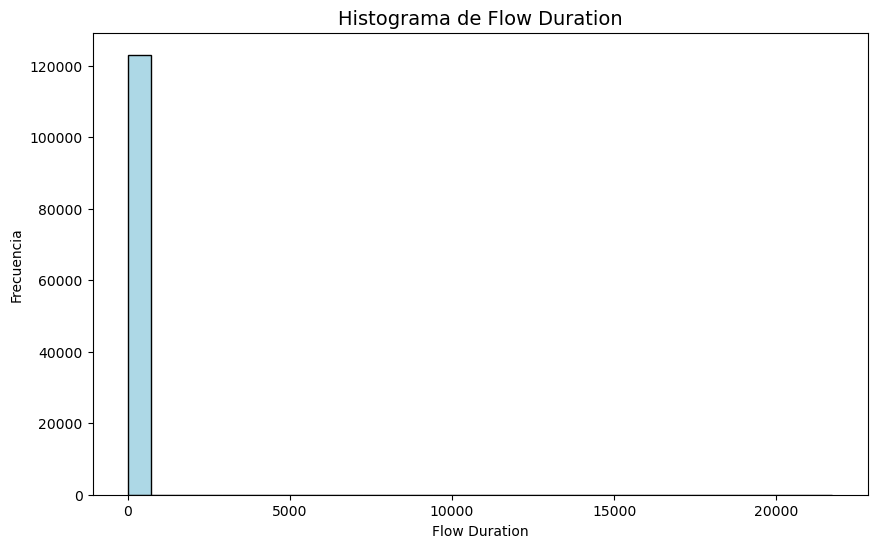

In [122]:
# Importar librerías necesarias
import matplotlib.pyplot as plt

# solución

# Mostrar el gráfico
plt.show()

### Ejercicio 8: Mostar un boxplot con el historial de la columna flow_duration 
Hay ocasiones en el que un histograma no muestra toda la información posible, en este ejercicio se solicita mostrar un boxplot para poder analizar mejor el problema

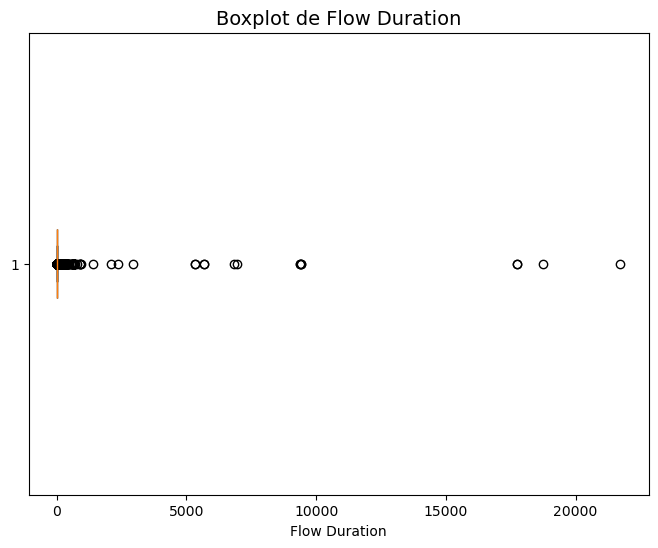

In [124]:
# Importar librerías necesarias
import matplotlib.pyplot as plt

# solución

# Mostrar el gráfico
plt.show()

### Ejercicio 8: Cálculo de moda

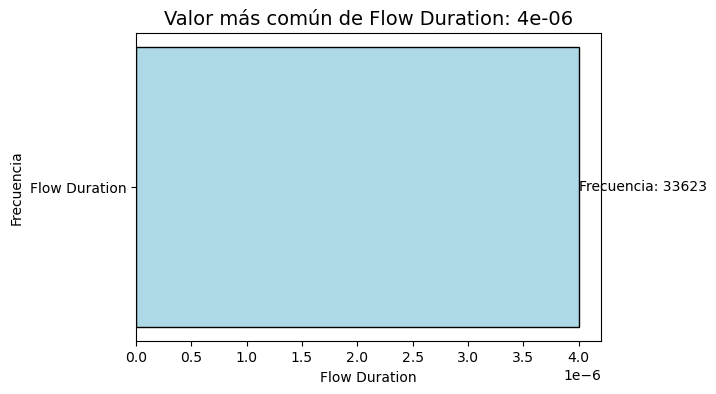

In [126]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# solución

# Mostrar el gráfico
plt.show()

### Ejercicio 9: Cálculo de correlaciones

In [128]:
# Calcular la correlación entre flow_duration y fwd_pkts_tot
# solución
print(f"Correlación entre flow_duration y fwd_pkts_tot: {correlation_duration_fwd_pkts}")

# Calcular la correlación entre flow_duration y bwd_pkts_tot
# solución
print(f"Correlación entre flow_duration y Attack_type: {correlation_duration_bwd_pkts}")

Correlación entre flow_duration y fwd_pkts_tot: 0.7415701934915049
Correlación entre flow_duration y Attack_type: 0.0713854023649293


### Ejercicio 10 (EXTRA ML): Normalización de las columnas numéricas

Aplica normalización en las columnas numéricas de flow_duration.


In [130]:
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.linalg import Vectors
from pyspark.sql.functions import col

# solución

+--------------------+
|     scaled_features|
+--------------------+
|[0.00147326507753...|
|[0.00146737350799...|
|[0.00147844057749...|
|[0.00147093931264...|
|[0.00146823772513...|
|[0.00146673388238...|
|[0.00147709017493...|
|[0.00147751818747...|
|[0.00147397240276...|
|[0.00147496971799...|
|[9.09898042076345...|
|[0.04289156454963...|
|[0.00147113440351...|
|[0.00146744452125...|
|[0.00146935221454...|
|[0.00147555784403...|
|[0.00147388689230...|
|[0.00146850856962...|
|[0.00147315646359...|
|[0.00146953202583...|
+--------------------+
only showing top 20 rows

